# Iterative Solvers
## Exercise 1: Implement the Jacobi Method

In [38]:
import numpy as np

# Implement the Jacobi Method

def Jacobi(A, b, tol, maxiter):
    epsi = 1
    iter =0
    x0 = np.zeros_like(b)
    x = np.zeros_like(b)
    U = np.triu(A, k = 1)
    L = np.tril(A, k = -1)
    D = np.diagonal(A)
    print(D)
    print(np.reciprocal(D))
    while (epsi > tol) & (iter < maxiter):
        print("iteration number", iter)

        x    = x0 + np.reciprocal(D)*(b - A @ x0)
#         print(x)
        
        epsi = np.linalg.norm(x-x0, np.inf)
        print("error is", epsi)
        x0   = x
        iter = iter + 1
    print("Converged!")
    return x
        
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
    n (int): The dimension of the system.
    num_entries (int): The number of nonzero values.
    Defaults to n^(3/2)-n.
    Returns:
    A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A


In [39]:
tol = 1e-6
maxiter = 1000
n = 10
b = np.random.random(n)
A = diag_dom(n)

result = Jacobi(A, b, tol, maxiter)

[7. 6. 1. 3. 3. 5. 2. 9. 8. 1.]
[0.14285714 0.16666667 1.         0.33333333 0.33333333 0.2
 0.5        0.11111111 0.125      1.        ]
iteration number 0
error is 0.5170297425115593
iteration number 1
error is 0.3446864950077062
iteration number 2
error is 0.20681189700462377
iteration number 3
error is 0.06337907926520159
iteration number 4
error is 0.04225271951013437
iteration number 5
error is 0.019252927604935525
iteration number 6
error is 0.002263538545185781
iteration number 7
error is 0.0010314068359786877
iteration number 8
error is 0.0001212609934920783
iteration number 9
error is 5.52539376417055e-05
iteration number 10
error is 6.4961246513672855e-06
iteration number 11
error is 2.9600323736694856e-06
iteration number 12
error is 3.480066777666879e-07
Converged!


In [41]:
np.allclose(A @ result, b)

True

## Exercise 2

In [50]:
from matplotlib import pyplot as plt

def Jacobi(A, b, tol, maxiter, plot=False):
    epsi = 1
    iter =0
    x0 = np.zeros_like(b)
    x = np.zeros_like(b)
    U = np.triu(A, k = 1)
    L = np.tril(A, k = -1)
    D = np.diagonal(A)
    error = []
    while (epsi > tol) & (iter < maxiter):
        print("iteration number", iter)

        x    = x0 + np.reciprocal(D)*(b - A @ x0)
#       print(x)
        
        epsi = np.linalg.norm(x-x0, np.inf)
        abserror = np.linalg.norm(A @ x - b, np.inf)
        error.append(abserror)
        print("error is", epsi)
        x0   = x
        iter = iter + 1
        
    print("Converged!")
    if plot == True:
        plt.semilogy(range(iter), error)
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.title('Convergence of Jacobi Method')
        plt.show()
        
    return x


iteration number 0
error is 0.9955261350246333
iteration number 1
error is 0.6508857325893177
iteration number 2
error is 0.4339238217262118
iteration number 3
error is 0.1085810782937236
iteration number 4
error is 0.04825825701943265
iteration number 5
error is 0.03217217134628836
iteration number 6
error is 0.008891927076440653
iteration number 7
error is 0.003951967589529204
iteration number 8
error is 0.002634645059686136
iteration number 9
error is 0.0007117689325655818
iteration number 10
error is 0.00031634174780692526
iteration number 11
error is 0.00021089449853795017
iteration number 12
error is 7.571360533054072e-05
iteration number 13
error is 2.558369732769128e-05
iteration number 14
error is 1.5949770581280553e-05
iteration number 15
error is 7.580354763891961e-06
iteration number 16
error is 2.3627653524815884e-06
iteration number 17
error is 1.135919999423196e-06
iteration number 18
error is 7.000786228505973e-07
Converged!


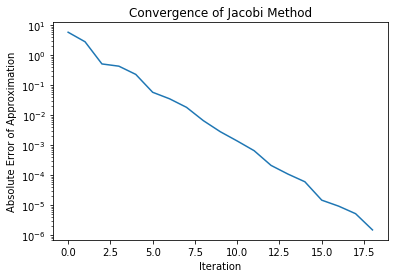

In [51]:
tol = 1e-6
maxiter = 1000
n = 10
b = np.random.random(n)
A = diag_dom(n)

result = Jacobi(A, b, tol, maxiter, plot=True)

## Exercise 3: Gauss-Seidel Method

In [79]:
from matplotlib import pyplot as plt

def GaussSeidel(A, b, tol, maxiter, plot=False):
    epsi = 1
    iter =0
    x0 = np.zeros_like(b)
    x = np.zeros_like(b)
    D = np.diagonal(A)
    error = []
    while (epsi > tol) & (iter < maxiter):
        print("iteration number", iter)

        for i,item in enumerate(b):
            x0 = np.copy(x) # Copy update to get faster convergence
            x[i] = x0[i] + D[i]**(-1) * (item - np.dot(A[i,:],x0))


#       print(x)
        
        epsi = np.linalg.norm(x-x0, np.inf)
        abserror = np.linalg.norm(A @ x - b, np.inf)
        error.append(abserror)
        print("error is", epsi)
        x0   = x
        iter = iter + 1
        
    print("Converged!")
    if plot == True:
        plt.semilogy(range(iter), error)
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.title('Convergence of Gauss-Seidel Method')
        plt.show()
        
    return x


iteration number 0
error is 0.0026433673462835637
iteration number 1
error is 9.804576968794072e-05
iteration number 2
error is 9.708811782014205e-06
iteration number 3
error is 7.033968281370921e-07
Converged!


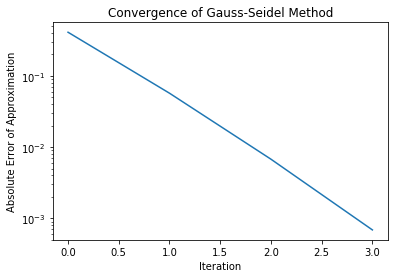

In [83]:
tol = 1e-6
maxiter = 1000
n = 10000
b = np.random.random(n)
A = diag_dom(n)

result = GaussSeidel(A, b, tol, maxiter, plot=True)

## Problem 4: Solving Sparse Systems

In [91]:
from matplotlib import pyplot as plt
from scipy import sparse

def GaussSeidel_sparse(A, b, tol, maxiter, plot=False):
    epsi = 1
    iter =0
    x0 = np.zeros_like(b)
    x = np.zeros_like(b)
    D = sparse.csr_matrix.diagonal(A)
    error = []
    while (epsi > tol) & (iter < maxiter):
        print("iteration number", iter)

        for i,item in enumerate(b):
            # Get the indices of where the i-th row of A starts and ends if the
            # nonzero entries of A were flattened.
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            # Multiply only the nonzero elements of the i-th row of A with the
            # corresponding elements of x.
            Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]
            x0 = np.copy(x) # Copy update to get faster convergence
            x[i] = x0[i] + D[i]**(-1) * (item - Aix)


#       print(x)
        
        epsi = np.linalg.norm(x-x0, np.inf)
        abserror = np.linalg.norm(A @ x - b, np.inf)
        error.append(abserror)
        print("error is", epsi)
        x0   = x
        iter = iter + 1
        
    print("Converged!")
    if plot == True:
        plt.semilogy(range(iter), error)
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.title('Convergence of Jacobi Method')
        plt.show()
        
    return x


iteration number 0
error is 0.0037268337422515525
iteration number 1
error is 7.049585897745151e-05
iteration number 2
error is 8.802198545417982e-06
iteration number 3
error is 8.621718271951788e-07
iteration number 4
error is 8.251450477015851e-08
iteration number 5
error is 7.964747701216107e-09
iteration number 6
error is 7.805145544638459e-10
iteration number 7
error is 7.541784644710114e-11
iteration number 8
error is 7.269448498020692e-12
iteration number 9
error is 7.004800385568277e-13
iteration number 10
error is 6.751977449370727e-14
iteration number 11
error is 6.5134529714239164e-15
iteration number 12
error is 6.2753621743461e-16
Converged!


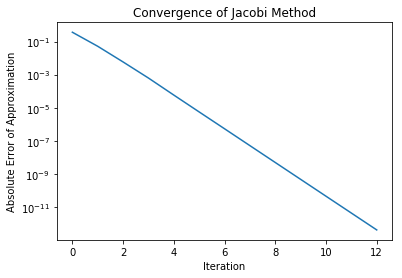

In [95]:
tol = 1e-15
maxiter = 1000
n = 20000
b = np.random.random(n)
A = sparse.csr_matrix(diag_dom(n))

result = GaussSeidel_sparse(A, b, tol, maxiter, plot=True)

## Exercise 5: Successive Over-Relaxation

In [93]:
from matplotlib import pyplot as plt
from scipy import sparse

def SOR(A, b, ω, tol, maxiter, plot=False):
    epsi = 1
    iter =0
    x0 = np.zeros_like(b)
    x = np.zeros_like(b)
    D = sparse.csr_matrix.diagonal(A)
    error = []
    while (epsi > tol) & (iter < maxiter):
        print("iteration number", iter)

        for i,item in enumerate(b):
            # Get the indices of where the i-th row of A starts and ends if the
            # nonzero entries of A were flattened.
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            # Multiply only the nonzero elements of the i-th row of A with the
            # corresponding elements of x.
            Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]
            x0 = np.copy(x) # Copy update to get faster convergence
            x[i] = x0[i] + ω * D[i]**(-1) * (item - Aix)


#       print(x)
        
        epsi = np.linalg.norm(x-x0, np.inf)
        abserror = np.linalg.norm(A @ x - b, np.inf)
        error.append(abserror)
        print("error is", epsi)
        x0   = x
        iter = iter + 1
        
    print("Converged!")
    if plot == True:
        plt.semilogy(range(iter), error)
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.title('Convergence of SOR Method')
        plt.show()
        
    return x


iteration number 0
error is 0.004458124995774325
iteration number 1
error is 0.002958659895793237
iteration number 2
error is 0.0018000727993078332
iteration number 3
error is 0.0010369657316016603
iteration number 4
error is 0.0005766509654048938
iteration number 5
error is 0.00031378708563838814
iteration number 6
error is 0.00016882967140863236
iteration number 7
error is 9.054552457335614e-05
iteration number 8
error is 4.8694903340071316e-05
iteration number 9
error is 2.6363243096470205e-05
iteration number 10
error is 1.4398406246497915e-05
iteration number 11
error is 7.93842139592757e-06
iteration number 12
error is 4.418061338135049e-06
iteration number 13
error is 2.4814454910246364e-06
iteration number 14
error is 1.4065230156653022e-06
iteration number 15
error is 8.048387142405022e-07
iteration number 16
error is 4.652186535590748e-07
iteration number 17
error is 2.718094644477663e-07
iteration number 18
error is 1.6057659615485373e-07
iteration number 19
error is 9.59042

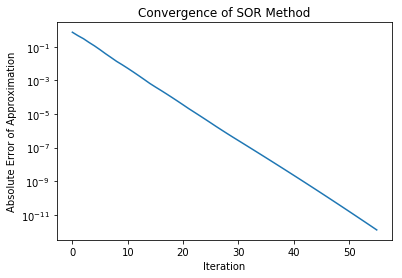

In [96]:
tol = 1e-15
maxiter = 1000
n = 20000
b = np.random.random(n)
A = sparse.csr_matrix(diag_dom(n))
ω = 1.5
result = SOR(A, b, ω, tol, maxiter, plot=True)

## Exercise 6: Finite Difference Method

In [268]:
from matplotlib import pyplot as plt
from scipy import sparse
from scipy import linalg

def FDM(A, b, ω, tol=1e-8, maxiter=100, plot=False):
    epsi = 1
    iter =0
    x0 = np.zeros_like(b)
    x = np.zeros_like(b)
    D = sparse.csr_matrix.diagonal(A)
    error = []
    while (epsi > tol) & (iter < maxiter):
        print("iteration number", iter)

        for i,item in enumerate(b):
            # Get the indices of where the i-th row of A starts and ends if the
            # nonzero entries of A were flattened.
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            # Multiply only the nonzero elements of the i-th row of A with the
            # corresponding elements of x.
            Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]
            x0 = np.copy(x) # Copy update to get faster convergence
            x[i] = x0[i] + ω * D[i]**(-1) * (item - Aix)


#       print(x)
        
        epsi = np.linalg.norm(x-x0, np.inf)
        abserror = np.linalg.norm(A @ x - b, np.inf)
        error.append(abserror)
        print("error is", epsi)
        x0   = x
        iter = iter + 1
        
    print("Converged!")
    if plot == True:
        plt.semilogy(range(iter), error)
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.title('Convergence of SOR Method')
        plt.show()
        
        U = x.reshape(n,n)
        plt.pcolormesh(U, cmap='coolwarm')
        plt.colorbar()
        
    return x


Size D 49
Size b (49,)
iteration number 0
error is 27.28326772607081
iteration number 1
error is 13.764075594253836
iteration number 2
error is 5.476915820292739
iteration number 3
error is 1.6349218355700934
iteration number 4
error is 0.30476097218220843
iteration number 5
error is 0.0014358434938337439
iteration number 6
error is 0.022274555489669723
iteration number 7
error is 0.00630444133363639
iteration number 8
error is 0.0001493603289581813
iteration number 9
error is 0.0005569398700089323
iteration number 10
error is 0.00010287727426572246
iteration number 11
error is 1.569096513165391e-05
iteration number 12
error is 1.066685120676425e-05
iteration number 13
error is 2.0755416112905323e-05
iteration number 14
error is 1.0100611302021889e-05
iteration number 15
error is 1.2727185207950242e-06
iteration number 16
error is 1.0908737024806214e-06
iteration number 17
error is 8.426060169597349e-07
iteration number 18
error is 5.019374675896415e-07
iteration number 19
error is 3.7

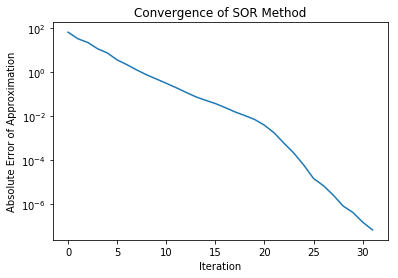

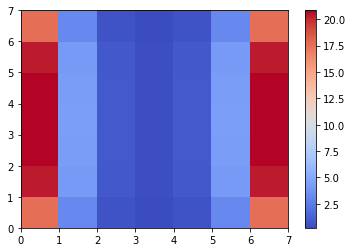

In [271]:
n = 7
#Construct b
b = np.zeros(n)
b[0] = -100
b[len(b)-1] = -100
b = np.tile(b, n)

#Construct B
offsets = [-1,0,1]
B = sparse.diags([1,-n,1], offsets, shape=(n,n))

#Construct the Is
offsets = [-n,n]
I = sparse.diags([1,1], offsets, shape=(n**2,n**2))

#Construct A
A = sparse.block_diag([B]*n) + I



ω = 1.5
result = FDM(A, b, ω, plot=True)

## Exercise 7

In [273]:
from matplotlib import pyplot as plt
from scipy import sparse
from scipy import linalg

def FDM(A, b, ω, tol=1e-8, maxiter=100, plot=False):
    epsi = 1
    iter =0
    x0 = np.zeros_like(b)
    x = np.zeros_like(b)
    D = sparse.csr_matrix.diagonal(A)
    error = []
    while (epsi > tol) & (iter < maxiter):
#         print("iteration number", iter)

        for i,item in enumerate(b):
            # Get the indices of where the i-th row of A starts and ends if the
            # nonzero entries of A were flattened.
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            # Multiply only the nonzero elements of the i-th row of A with the
            # corresponding elements of x.
            Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]
            x0 = np.copy(x) # Copy update to get faster convergence
            x[i] = x0[i] + ω * D[i]**(-1) * (item - Aix)


#       print(x)
        
        epsi = np.linalg.norm(x-x0, np.inf)
        abserror = np.linalg.norm(A @ x - b, np.inf)
        error.append(abserror)
#         print("error is", epsi)
        x0   = x
        iter = iter + 1
        
    print("Converged!")
    if plot == True:
        plt.semilogy(range(iter), error)
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.title('Convergence of SOR Method')
        plt.show()
        
        U = x.reshape(n,n)
        plt.pcolormesh(U, cmap='coolwarm')
        plt.colorbar()
        
    return iter


Converged!
Converged!
Converged!
Converged!
Converged!
Converged!
Converged!
Converged!
Converged!
Converged!
Converged!
Converged!
Converged!
Converged!
Converged!
Converged!
Converged!
Converged!
Converged!
Converged!


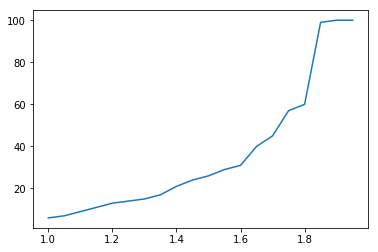

In [278]:
n = 20
#Construct b
b = np.zeros(n)
b[0] = -100
b[len(b)-1] = -100
b = np.tile(b, n)

#Construct B
offsets = [-1,0,1]
B = sparse.diags([1,-n,1], offsets, shape=(n,n))

#Construct the Is
offsets = [-n,n]
I = sparse.diags([1,1], offsets, shape=(n**2,n**2))

#Construct A
A = sparse.block_diag([B]*n) + I

ω = np.arange(1,2,0.05)
iter = []
for i, item in enumerate(ω):
    omega = item
    iter.append(FDM(A, b, omega, plot=False))
    
plt.plot(ω, iter)
plt.show()
    
    